# Graphnet-Automata Model Revision, #3.1

## First we import the necessary libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community
import scipy.ndimage as nd

from pyvis.network import Network

import collections

In [2]:
import warnings; warnings.simplefilter('ignore')

## A kernel has been introduced to facilitate the search for new graphs

In [3]:
KERNEL = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0]], dtype=np.uint8)

In [10]:
# convolution code courtesy of salt-die
class generator_state:
    seed = nx.to_numpy_matrix(nx.erdos_renyi_graph(13, 0.05, seed = 1, directed=True))
    
    def next_state(self):
        seed = self.seed
        seed = np.pad(seed, (1, 1), 'constant')
        neighbor_count = nd.convolve(seed, KERNEL, mode="constant")
        self.seed = np.where(((seed == 0) & (neighbor_count > 0) & (neighbor_count <= 4)) |
                                 ((seed == 1) & (neighbor_count > 4)), 1, 0)
        return(self.seed)
    
    def run(self):
        while True:
            for _ in range(200):
                self.next_state()
            return(self.seed)

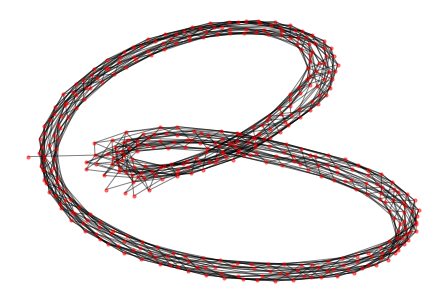

In [11]:
gen = generator_state()
gen_g1 = nx.from_numpy_matrix(gen.run())
nx.draw(gen_g1, node_size=10, alpha=0.5)
#plt.savefig('g3.1_200.png')
plt.show()

### Bring it to life; interact with it!

In [12]:
G = Network(height=800, width=800, notebook=True)
G.toggle_hide_edges_on_drag(False)
G.barnes_hut()
G.from_nx(gen_g1)
G.show("ex.html")